## Rozwiązywanie równań różniczkowych metodami algebry liniowej 

#### Zadanie 1
Zaimplementuj metodą iteracyjną rozwiązywania układów równań Czebyszewa. 

In [10]:
import numpy as np
from scipy.linalg import norm
import math
import matplotlib.pyplot as plt

def solve_chebyshev(A, b, iter_num, l_max, l_min, size = 10, eps = 1e-15):
    d = (l_max + l_min) / 2
    c = (l_max - l_min) / 2
    preCond = np.identity(2)
    x = np.zeros(size**2)
    r = b - np.matmul(A, x)
    iter_count = 0

    for i in range(1, iter_num + 1):
        iter_count = iter_count + 1
        z = np.linalg.solve(A, r)
        alpha = 1
        if i == 1:
            p = z
            alpha = 1 / d
        elif (i == 2):
            beta = (1 / 2) * (c * alpha) ** 2
            alpha = 1 / (d - beta / alpha)
            p = z + beta * p
        else:
            beta = (c * alpha / 2) ** 2
            alpha = 1 / (d - beta / alpha)
            p = z + beta * p
        x = x + alpha * p
        r = np.matmul(A, x)
        r = b - r
        if norm(r) < eps:
            return [x, iter_count]
    return [x, iter_count]

#### Zadanie 2
Zapoznaj się z prezentacją dr Rycerz o sposobie rozwiązywaniu równania różniczkowego Poissona dla dwóch wymiarów (metoda różnic skończonych).

Rozwiąż równanie Poissona w przestrzeni 2D. Funkcja rozkładu źródeł ma postać: $$\rho(x,y) = \frac{x+y}{2}$$    
Obliczenia dokonujemy w obszarze dwuwymiarowym: $$\Omega = [0,10] \times [0,10]$$ Siatkę proszę dobrać samodzielnie tak by obliczenie nie było zbyt długie (na podstawie wcześniejszy testów metod iteracyjnych).   
Warunki brzegowe jednorodne Dirichleta: 0 na brzegach. 

Przedstaw sposób konstrukcji układu równań w metodzie różnic skończonych dla tego równiania. Przedstaw rozwiązanie graficznie. 

#### Postać równania do rozwiązania:


#### Po rozpisaniu operatora Laplace'a uzyskujemy nastepujace równanie:
 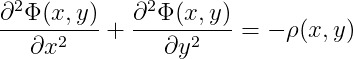

#### Zadana postać funkcji rozkładu źródeł: 
 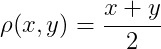

#### Jednorodne warunki Dirichleta, zero na brzegach:
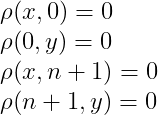

Aby przybliżyć pochodne za pomocą różnic skończonych wprowadzamy siatkę:


gdzie: 


#### Zadanie 3
Zastosuj do otrzymanego układu równań metody Gaussa-Seidla, SOR i Czebyszewa. Porównaj zbieżność tych metod. 

In [ ]:
import numpy as np 

def Gauss_Seidel_method(A, B, max_iterations=500, epsilon=1e-10):
    DL = np.tril(A)
    U = A - DL
    DL_inv = np.linalg.inv(DL)
    X = np.zeros(len(B))
    for i in range(max_iterations):
        X_new = np.zeros(len(X))
        X_new = np.dot(DL_inv, B - np.dot(U, X))
        if np.linalg.norm(X_new - X) < epsilon:
            return X_new
        X = X_new
    return X

In [ ]:
import numpy  as np

def sor_solver(A, B, max_iterations = 500, omega = 0.8,  epsilon= 1e-10):
    D = np.diag(np.diag(A))
    L = np.tril(A - D)
    U = A - D - L
    D_inv = np.linalg.inv(D)
    D_inv_omega = np.dot(D_inv, omega)
    X = np.zeros(len(B))
    for i in range(max_iterations):
        X_new = np.zeros(len(X))
        X_new = np.add(np.dot((1- omega), X), np.dot(D_inv_omega, B - np.dot(L, X) - np.dot(U, X)))
        if np.linalg.norm(X_new - X) < epsilon:
            return X_new
        X = X_new
    return X